import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('../datasets/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Data Preprocessing

In [10]:
X = data.drop(axis = 1, columns = ['Position','Salary']).values
y = data.Salary.values

We won't need to split the data, since it is already small enough and we want an accurate predictor. No need for feature scaling as well, since the library itself does the scaling.

## Comparing Models

### 1 - Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression

In [16]:
linear = LinearRegression()
linear.fit(X, y)
lin_predict = linear.predict(X)

In [17]:
for i, yi in enumerate(y):
    print(i,'ŷ =',lin_predict[i],'  y =', yi)

0 ŷ = -114454.54545454548   y = 45000
1 ŷ = -33575.7575757576   y = 50000
2 ŷ = 47303.030303030275   y = 60000
3 ŷ = 128181.81818181818   y = 80000
4 ŷ = 209060.60606060608   y = 110000
5 ŷ = 289939.3939393939   y = 150000
6 ŷ = 370818.1818181819   y = 200000
7 ŷ = 451696.9696969697   y = 300000
8 ŷ = 532575.7575757576   y = 500000
9 ŷ = 613454.5454545455   y = 1000000


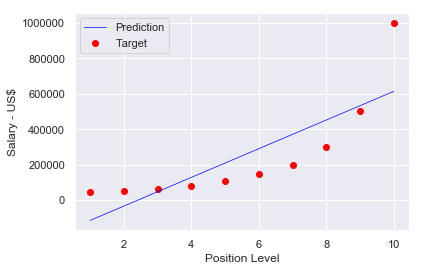

In [35]:
plt.scatter(X, y, label = 'Target', color = 'red')
plt.plot(X, lin_predict, label = 'Prediction', color = 'blue', linewidth = 0.7)
plt.xlabel('Position Level')
plt.ylabel('Salary - US$')
plt.legend()

### 2- Polynomial Regression Model

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
polynomial = PolynomialFeatures(degree = 3)
X_poly = polynomial.fit_transform(X)

In [49]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [50]:
linear_2 = LinearRegression()
linear_2.fit(X_poly, y)
lin2_pred = linear_2.predict(X_poly)

In [51]:
for i, yi in enumerate(y):
    print(i,'ŷ =',lin2_pred[i],'  y =', yi)

0 ŷ = 14902.097902106558   y = 45000
1 ŷ = 78759.90675990653   y = 50000
2 ŷ = 94960.37296036904   y = 60000
3 ŷ = 88223.77622377244   y = 80000
4 ŷ = 83270.39627039479   y = 110000
5 ŷ = 104820.51282051438   y = 150000
6 ŷ = 177594.40559440968   y = 200000
7 ŷ = 326312.35431235866   y = 300000
8 ŷ = 575694.6386946386   y = 500000
9 ŷ = 950461.5384615303   y = 1000000


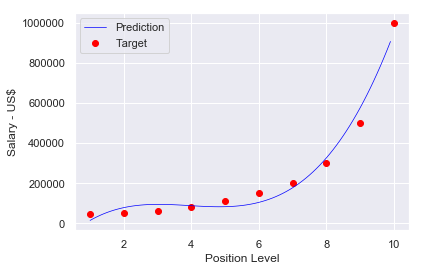

In [58]:
X_grid = np.arange(min(X), max(X), 0.1) # Grid values for better resolution of curve
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, label = 'Target', color = 'red')
plt.plot(X_grid, linear_2.predict(polynomial.fit_transform(X_grid)), label = 'Prediction', color = 'blue', linewidth = 0.7)
plt.xlabel('Position Level')
plt.ylabel('Salary - US$')
plt.legend()